# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #:

Names:Bowen Zhang              seth

# Getting started

In [1]:
# Import the robot class we are developing
import robot

In [2]:
# Make a new leg variable which is a robot.Leg class
leg = robot.Leg()

Connected!


In [29]:
leg.get_joint_pos()#simulation

print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

joint0: 1.570000 	 joint1: 1.570000


# Your code below!

In [4]:
import numpy as np
#import the data from 'bat_sign.m'
a = np.loadtxt('test_batman.txt') 
xx=a[0]
yy=a[1]
tt=58

In [5]:
#test the estimate time of IK for a single point 
a11=leg.inverse_kinematics(0, 18)

In [6]:
(simu_theta0, simu_theta1, simu_alpha0, simu_alpha1)=leg.move_trajectory(tt,xx, yy)

In [8]:
#Collect the data from the simulation, and import to 'ThetaAlpha_batsignX.txt' for the
#future use just to avoid wasting time to wait for the output
print(simu_theta0)
print(simu_theta1)
print(simu_alpha0)
print(simu_alpha1)
b=np.array([simu_theta0])
c=np.array([simu_theta1])
d=np.array([simu_alpha0])
e=np.array([simu_alpha1])
np.savetxt("Batsign_theta0.txt",b)
np.savetxt("Batsign_theta1.txt",c)
np.savetxt("Batsign_alpha0.txt",d)
np.savetxt("Batsign_alpha1.txt",e)

[2.93954657167360, 2.77096806694312, 2.69173023088843, 2.62716876937333, 2.56979716076946, 2.51686106201369, 2.46688426042448, 2.41899050602624, 2.37260921955184, 2.52820717355033, 2.52550663831082, 2.48852099827822, 2.42869434459795, 2.17212998156870, 2.24450156954763, 2.15858020405043, 2.04494394303940, 2.24902610978016, 2.21721585760760, 2.16468987678931, 2.08361418674277, 1.86042665089120, 1.82001726678030, 1.78044619781219, 1.74213328854808, 1.70573856152391, 1.67237412042511, 1.64419279306555, 1.62620680808100, 1.66782523742118, 1.81789661054673, 1.90943813550312, 1.99138998177380, 2.06860198684915, 2.14291373992883, 2.21527982123168, 2.20686199592083, 2.25062273174946, 2.31824364925342, 2.45040185160999, 2.44208434326826, 2.49743474583600, 2.58158410443368, 2.74511490539834, 2.68909137969924, 2.70708651111127, 2.75584237217387, 2.89328944003989, 2.83271173346437, 2.85984412459393, 2.92277918187816, 3.08698819611714, 3.10383936833938, 3.11259528822040, 3.11195137695777, 3.0988326

In [9]:
import matplotlib.pyplot as plt
from sympy import sin, cos
import numpy as np

%matplotlib qt5
def simu_leg(l_base, l1, l2, theta1, theta2, alpha1, alpha2, ax=False):
        """
        This function takes in the four angles of the leg and draws
        the configuration
        """

        link1, link2, width = l1, l2, l_base
        cor_range = l1 + l2
    
        if ax == False:
            ax = plt.gca()
            ax.cla()

        ax.plot(-width / 2, 0, 'ok')
        ax.plot(width / 2, 0, 'ok')

        ax.plot([-width / 2, 0], [0, 0], 'k')
        ax.plot([width / 2, 0], [0, 0], 'k')

        ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
        ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

        ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
        ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
            
        curr_x = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
        curr_y = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

        ax.plot(curr_x, curr_y, 'ro');

        ax.axis([-cor_range, cor_range, -l1, cor_range])
        ax.invert_yaxis()
for i in range(tt):
    simu_leg(8.3, 7.2, 14.2, simu_theta0[i], simu_theta1[i], simu_alpha0[i], simu_alpha1[i])
    plt.plot(xx[0:i+1], yy[0:i+1])
    plt.pause(.35)

#GIF
![Simulation of Trajectory gif](Bat_sign.gif)

In [3]:
(x_r,y_r) = leg.get_joint_pos()
print(float(x_r))
print(float(y_r))

1.5702053273202534
1.570210043768141


In [9]:
#import data from simulation
import numpy as np

theta_1=np.loadtxt('Batsign_theta1.txt') 
theta_0=np.loadtxt('Batsign_theta0.txt')

# move to zero encoder pos 
leg.move_home()


In [6]:
# read the home(zero) position and store it with rad as unit
leg.set_home()

In [11]:
#Use set_joint_pos to move the leg. instead of set_foot. Cause we already got the theta_0 and 
#theta_1
import time
for i in range(58):
    leg.set_joint_pos(theta_0[i], theta_1[i])
    time.sleep(.25)


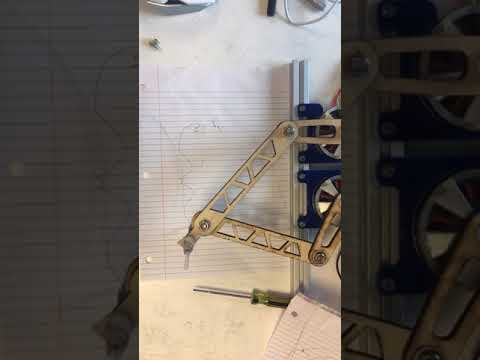

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('VlzL-fLWaxI')